<a href="https://colab.research.google.com/github/Zaim2005/ds-Zaim-Sheikh-/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
d1 = pd.read_csv('fear_greed_index.csv')
d2 = pd.read_csv('historical_data.csv')

In [ ]:
d1.columns
d1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
d2.columns
d2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
# 1) Parse sentiment dates (already daily)
d1['date'] = pd.to_datetime(d1['date']).dt.date

# 2) Parse trade timestamps (IST strings like "18-03-2025 12:50")
# If some rows include seconds, try a fallback format as well.
raw = d2['Timestamp IST'].astype(str).str.strip()

# First try without seconds
ts = pd.to_datetime(raw, format='%d-%m-%Y %H:%M', errors='coerce')

# Fallback: try with seconds where the first pass failed
mask = ts.isna()
if mask.any():
    ts2 = pd.to_datetime(raw[mask], format='%d-%m-%Y %H:%M:%S', errors='coerce')
    ts[mask] = ts2

# If you want to explicitly treat the string as IST local time:
# (not required if you only need the calendar date)
# ts = ts.dt.tz_localize('Asia/Kolkata')

d2['Timestamp_Parsed'] = ts
d2['date'] = d2['Timestamp_Parsed'].dt.date   # use IST calendar date



In [ ]:
d2.date

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
13974,2025-05-01
13975,2025-05-01
13976,2025-05-01
13977,2025-05-01


In [ ]:
daily_trades = (
    d2.groupby('date')
      .agg(
          daily_pnl=('Closed PnL', 'sum'),
          total_volume_usd=('Size USD', 'sum'),
          avg_trade_size_usd=('Size USD', 'mean'),
          avg_execution_price=('Execution Price', 'mean')
      )
      .reset_index()
)


In [ ]:
merged = d1.merge(daily_trades, on='date', how='inner')
merged

,timestamp,value,classification,date,daily_pnl,total_volume_usd,avg_trade_size_usd,avg_execution_price
0,1726810200,54,Neutral,2024-09-20,0.000000,28301.77,7075.442500,3.709000
1,1727155800,54,Neutral,2024-09-24,0.000000,6113.57,6113.570000,3.886000
2,1727242200,59,Greed,2024-09-25,0.000000,2753.02,917.673333,4.112000
3,1727328600,50,Neutral,2024-09-26,0.000000,33271.51,6654.302000,3.987420
4,1727415000,61,Greed,2024-09-27,0.000000,26104.72,567.493913,4.077009
...,...,...,...,...,...,...,...,...
93,1745645400,65,Greed,2025-04-26,0.000000,11004470.02,35046.082866,73860.812739
94,1745818200,54,Neutral,2025-04-28,37973.605394,25087715.08,38360.420612,94173.818043
95,1745904600,60,Greed,2025-04-29,117648.295306,31886938.40,32144.091129,57653.154375
96,1745991000,56,Greed,2025-04-30,0.000000,11030686.27,22932.819688,38769.898316


array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'value'}>],
       [<Axes: title={'center': 'daily_pnl'}>,
        <Axes: title={'center': 'total_volume_usd'}>],
       [<Axes: title={'center': 'avg_trade_size_usd'}>,
        <Axes: title={'center': 'avg_execution_price'}>]], dtype=object)

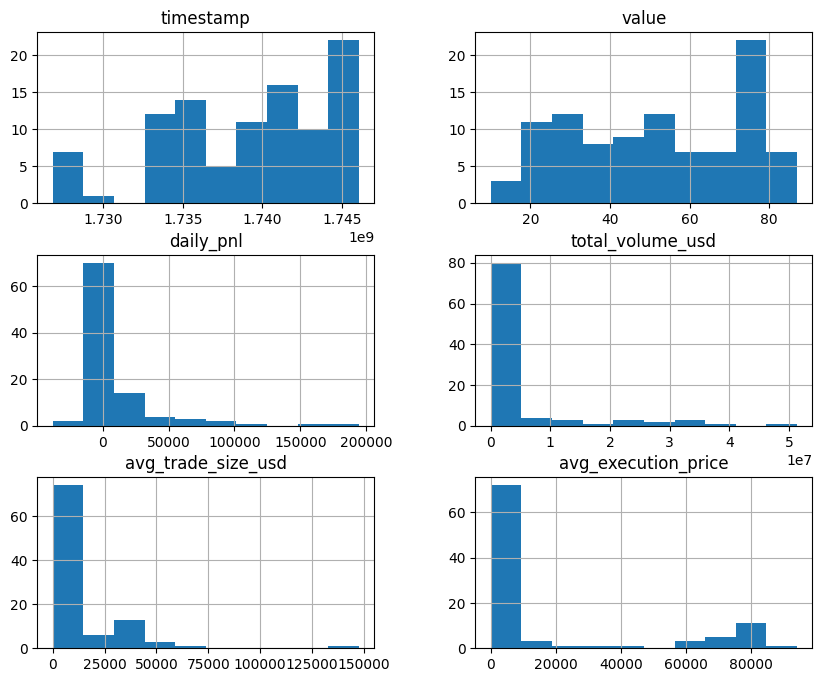

In [ ]:
merged.hist(bins = 10 , figsize = (10,8))

In [ ]:
correl = merged.drop(['timestamp' , 'classification' ,'date'],axis=1).copy()
correl

,value,daily_pnl,total_volume_usd,avg_trade_size_usd,avg_execution_price
0,54,0.000000,28301.77,7075.442500,3.709000
1,54,0.000000,6113.57,6113.570000,3.886000
2,59,0.000000,2753.02,917.673333,4.112000
3,50,0.000000,33271.51,6654.302000,3.987420
4,61,0.000000,26104.72,567.493913,4.077009
...,...,...,...,...,...
93,65,0.000000,11004470.02,35046.082866,73860.812739
94,54,37973.605394,25087715.08,38360.420612,94173.818043
95,60,117648.295306,31886938.40,32144.091129,57653.154375
96,56,0.000000,11030686.27,22932.819688,38769.898316


In [ ]:
pearson = correl.corr(method='pearson')['value']
spearman = correl.corr(method='spearman')['value']

In [ ]:
correlation_results = pd.DataFrame({
    'Pearson Corr with Sentiment': pearson,
    'Spearman Corr with Sentiment': spearman
})
correlation_results

,Pearson Corr with Sentiment,Spearman Corr with Sentiment
value,1.000000,1.000000
daily_pnl,-0.186909,-0.229715
total_volume_usd,-0.123117,-0.147715
avg_trade_size_usd,-0.171035,-0.142218
avg_execution_price,-0.243240,-0.117089


In [ ]:
import pandas as pd

# Make sure classification column exists in merged
if 'classification' in merged.columns:
    # Group by sentiment class
    sentiment_stats = merged.groupby('classification').agg({
        'daily_pnl': 'mean',                 # Average PnL
        'avg_trade_size_usd': 'median',      # Median trade size
        'total_volume_usd': 'mean',          # Avg volume for extra context
    }).reset_index()

    # Win rate: % of profitable days
    win_rate = merged.groupby('classification').apply(
        lambda x: (x['daily_pnl'] > 0).mean() * 100
    ).reset_index(name='win_rate_percent')

    # Merge stats + win rate
    sentiment_summary = pd.merge(sentiment_stats, win_rate, on='classification')
    print(sentiment_summary)
else:
    print("Column 'classification' not found in merged dataframe.")


  classification     daily_pnl  avg_trade_size_usd  total_volume_usd  \
0   Extreme Fear  11672.831972         6911.925000      3.846526e+05   
1  Extreme Greed   1343.693657         2931.364200      1.224734e+05   
2           Fear  19252.218599         8003.608636      8.370834e+06   
3          Greed   7665.301269         5006.270000      4.256754e+06   
4        Neutral  21083.966047         5925.500000      4.211462e+06   

   win_rate_percent  
0         45.454545  
1         12.500000  
2         55.555556  
3         27.586207  
4         33.333333  


/tmp/ipython-input-100728736.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate = merged.groupby('classification').apply(


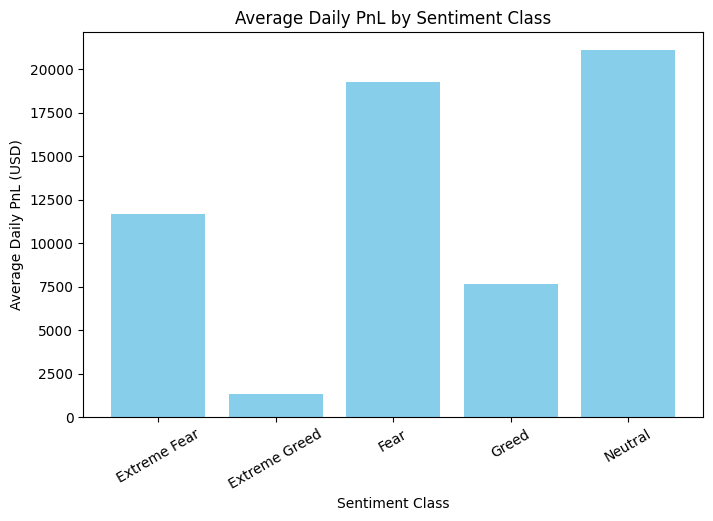

In [ ]:
# Plot 1: Avg Daily PnL
plt.figure(figsize=(8,5))
plt.bar(sentiment_summary['classification'], sentiment_summary['daily_pnl'], color='skyblue')
plt.title("Average Daily PnL by Sentiment Class")
plt.ylabel("Average Daily PnL (USD)")
plt.xlabel("Sentiment Class")
plt.xticks(rotation=30)
plt.show()

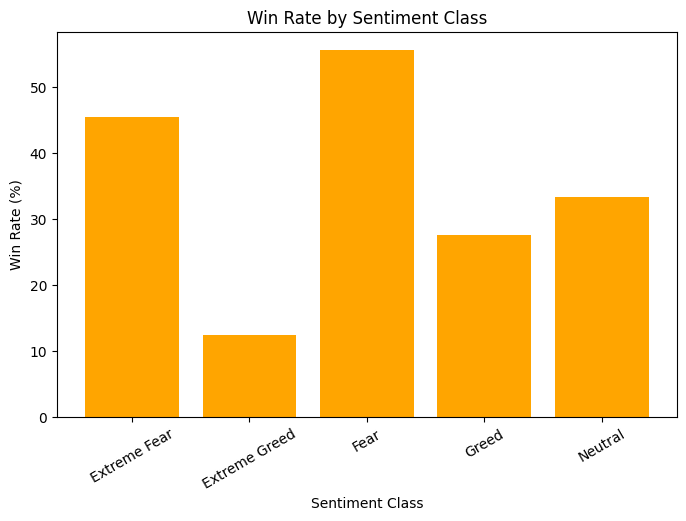

In [ ]:
# Plot 2: Win Rate %
plt.figure(figsize=(8,5))
plt.bar(sentiment_summary['classification'], sentiment_summary['win_rate_percent'], color='orange')
plt.title("Win Rate by Sentiment Class")
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment Class")
plt.xticks(rotation=30)
plt.show()


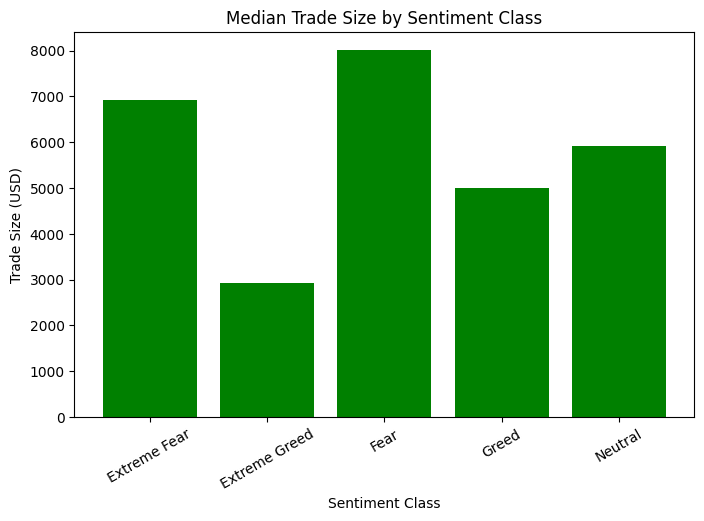

In [ ]:
# Plot 3: Trade Size (optional extra insight)
plt.figure(figsize=(8,5))
plt.bar(sentiment_summary['classification'], sentiment_summary['avg_trade_size_usd'], color='green')
plt.title("Median Trade Size by Sentiment Class")
plt.ylabel("Trade Size (USD)")
plt.xlabel("Sentiment Class")
plt.xticks(rotation=30)
plt.show()

In [ ]:
# --- 1. Create lagged features ---
merged = merged.sort_values('date')  # sort to ensure correct time order

# Yesterday's sentiment score
merged['sentiment_t-1'] = merged['value'].shift(1)
merged['sentiment_t-2'] = merged['value'].shift(2)

# Yesterday's classification (optional categorical analysis)
merged['class_t-1'] = merged['classification'].shift(1)

# Drop NaNs from shifting
merged_lagged = merged.dropna()
merged_lagged

,timestamp,value,classification,date,daily_pnl,total_volume_usd,avg_trade_size_usd,avg_execution_price,sentiment_t-1,sentiment_t-2,class_t-1
2,1727242200,59,Greed,2024-09-25,0.000000,2753.02,917.673333,4.112000,54.0,54.0,Neutral
3,1727328600,50,Neutral,2024-09-26,0.000000,33271.51,6654.302000,3.987420,59.0,54.0,Greed
4,1727415000,61,Greed,2024-09-27,0.000000,26104.72,567.493913,4.077009,50.0,59.0,Neutral
5,1727501400,64,Greed,2024-09-28,0.000000,29199.21,7299.802500,4.101000,61.0,50.0,Greed
6,1727674200,61,Greed,2024-09-30,0.000000,37388.95,389.468229,4.005525,64.0,61.0,Greed
...,...,...,...,...,...,...,...,...,...,...,...
93,1745645400,65,Greed,2025-04-26,0.000000,11004470.02,35046.082866,73860.812739,60.0,63.0,Greed
94,1745818200,54,Neutral,2025-04-28,37973.605394,25087715.08,38360.420612,94173.818043,65.0,60.0,Greed
95,1745904600,60,Greed,2025-04-29,117648.295306,31886938.40,32144.091129,57653.154375,54.0,65.0,Neutral
96,1745991000,56,Greed,2025-04-30,0.000000,11030686.27,22932.819688,38769.898316,60.0,54.0,Greed


In [ ]:
# --- 2. Correlation check ---
corrs = merged_lagged[['daily_pnl', 'total_volume_usd', 'sentiment_t-1', 'sentiment_t-2']].corr()
corrs[['sentiment_t-1','sentiment_t-2']]


,sentiment_t-1,sentiment_t-2
daily_pnl,-0.184428,-0.168128
total_volume_usd,-0.170415,-0.182422
sentiment_t-1,1.000000,0.913096
sentiment_t-2,0.913096,1.000000


In [ ]:
# --- 3. Group by yesterday's sentiment class ---
lagged_summary = merged_lagged.groupby('class_t-1').agg({
    'daily_pnl': 'mean',
    'total_volume_usd': 'mean',
    'avg_trade_size_usd': 'mean'
}).reset_index()

print(lagged_summary)


       class_t-1     daily_pnl  total_volume_usd  avg_trade_size_usd
0   Extreme Fear   2832.542068      1.067814e+06         6515.393331
1  Extreme Greed   1989.777514      1.329767e+05         4977.279307
2           Fear  29547.855336      9.080931e+06        23776.405212
3          Greed   3535.337687      3.645310e+06        11033.463006
4        Neutral  18842.468455      4.154919e+06        10813.994095


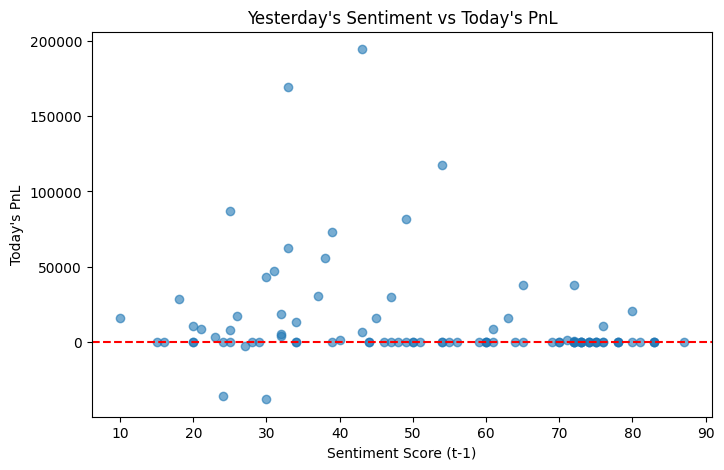

In [ ]:
# --- 4. Visualization ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(merged_lagged['sentiment_t-1'], merged_lagged['daily_pnl'], alpha=0.6)
plt.title("Yesterday's Sentiment vs Today's PnL")
plt.xlabel("Sentiment Score (t-1)")
plt.ylabel("Today's PnL")
plt.axhline(0, color='red', linestyle='--')
plt.show()


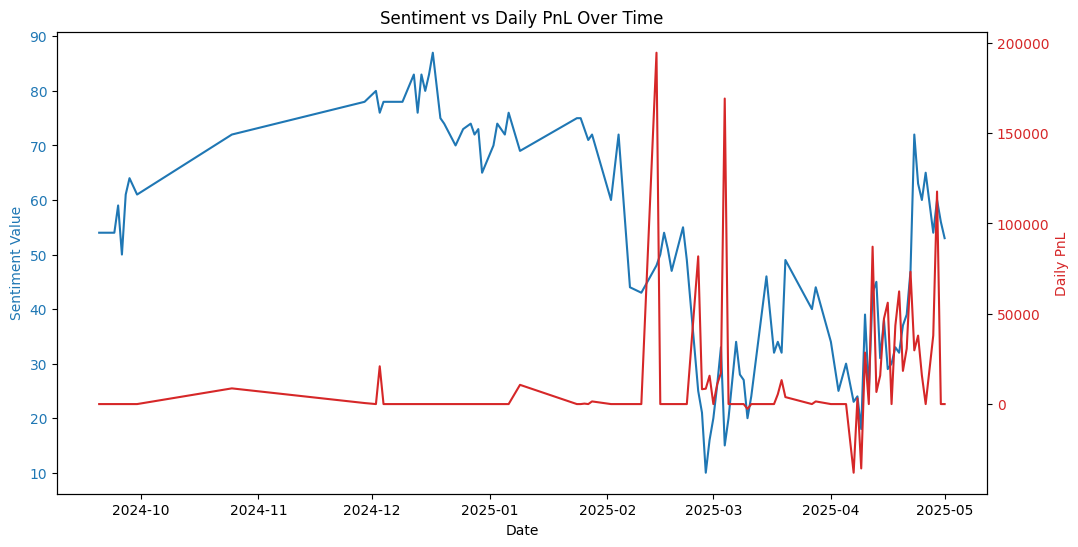

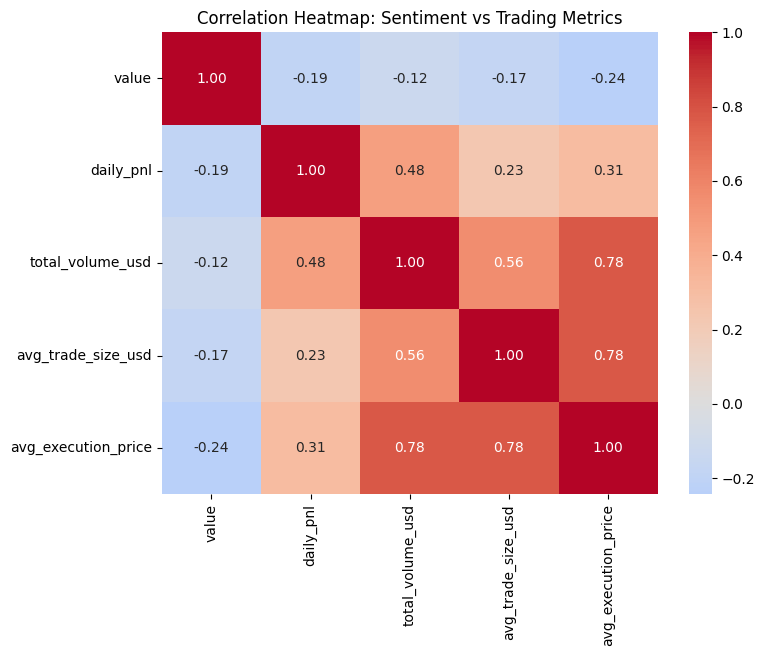

/tmp/ipython-input-91915979.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x='classification', y='daily_pnl', palette='Set2')


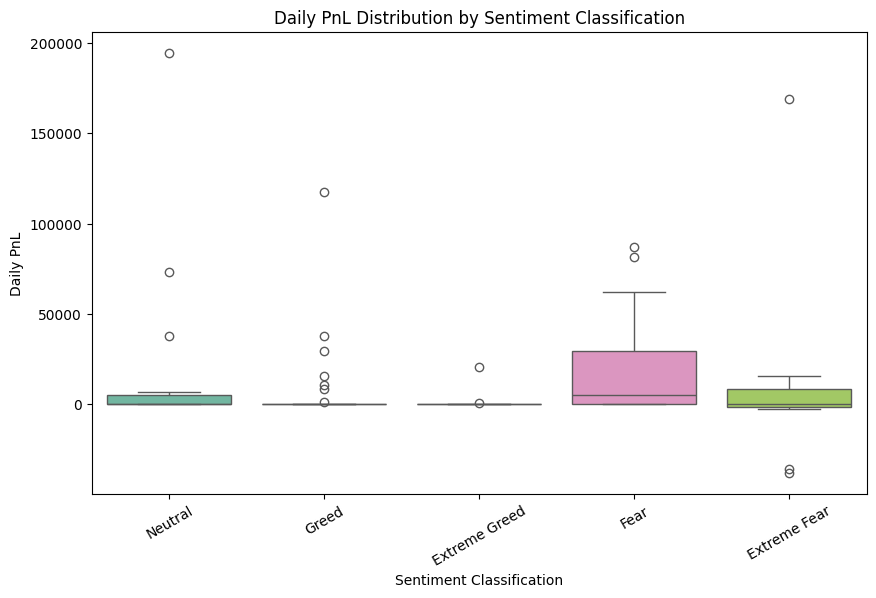

In [ ]:

import seaborn as sns

# ---------- 1. Time-Series Overlay ----------
fig, ax1 = plt.subplots(figsize=(12,6))

# Sentiment on left y-axis
ax1.plot(merged['date'], merged['value'], color='tab:blue', label='Sentiment (Fear-Greed)')
ax1.set_xlabel("Date")
ax1.set_ylabel("Sentiment Value", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Daily PnL on right y-axis
ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['daily_pnl'], color='tab:red', label='Daily PnL')
ax2.set_ylabel("Daily PnL", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Sentiment vs Daily PnL Over Time")
plt.show()


# ---------- 2. Heatmap of Correlations ----------
corr_cols = ['value', 'daily_pnl', 'total_volume_usd', 'avg_trade_size_usd', 'avg_execution_price']
corr_matrix = merged[corr_cols].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap: Sentiment vs Trading Metrics")
plt.show()


# ---------- 3. Boxplots: PnL by Sentiment Class ----------
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x='classification', y='daily_pnl', palette='Set2')
plt.title("Daily PnL Distribution by Sentiment Classification")
plt.xlabel("Sentiment Classification")
plt.ylabel("Daily PnL")
plt.xticks(rotation=30)
plt.show()
